In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.linear_model import LinearRegression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#  Import and read the csv.
import pandas as pd 
url="https://raw.githubusercontent.com/Wavelydavely/World_Happiness_Report/main/Cleaned_Data/WHR_noNull.csv"
happiness_df = pd.read_csv(url)
happiness_df

,country,year,world_region,happiness_score,economic_production,social_support,life_expectancy,freedom,generosity,perceptions_of_corruption
0,Denmark,2005,Western Europe,8.019,10.851,0.972,69.600,0.971,0.161533,0.237
1,Denmark,2008,Western Europe,7.971,10.880,0.954,70.080,0.970,0.272000,0.248
2,Finland,2020,Western Europe,7.889,10.750,0.962,72.100,0.962,-0.116000,0.164
3,Finland,2018,Western Europe,7.858,10.783,0.962,71.900,0.938,-0.127000,0.199
4,Finland,2021,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098000,0.186
...,...,...,...,...,...,...,...,...,...,...
2080,Central African Republic,2016,Sub-Saharan Africa,2.693,6.785,0.290,44.900,0.624,0.033000,0.859
2081,Syria,2013,Middle East and North Africa,2.688,8.396,0.585,58.760,0.455,0.225000,0.663
2082,Afghanistan,2017,South Asia,2.662,7.697,0.491,52.800,0.427,-0.121000,0.954
2083,Afghanistan,2021,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102000,0.924


In [ ]:
# Split our preprocessed data into our features and target arrays
y = happiness_df["happiness_score"] # y = dependent = ladder score
X = happiness_df[["economic_production", "social_support", "life_expectancy", "freedom", "generosity", "perceptions_of_corruption"]] # X = independent = any other variable



# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.3)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Introduce regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Print the intercept and coefficients
print("Intercept: ", regressor.intercept_)
print("Coefficients:")
list(zip(X, regressor.coef_))

Intercept:  -1.8121322866296685
Coefficients:


[('economic_production', 0.3568809070868286),
 ('social_support', 2.69492396527721),
 ('life_expectancy', 0.022307754091398735),
 ('freedom', 1.0382905536286635),
 ('generosity', 0.7306194604828934),
 ('perceptions_of_corruption', -0.6036477556045834)]

In [ ]:
# Create vector of predictions
y_pred = regressor.predict(X_test)

In [ ]:
print(f"Prediction: {y_pred}")

Prediction: [6.28658926 5.15737274 6.22573115 5.28662433 4.94755223 5.441694
 5.45618895 5.61625493 5.36914868 7.18143419 5.14033872 5.52474937
 4.31559404 6.39594262 6.73910354 5.54635899 5.90360815 4.34478235
 5.31776834 6.18661267 4.31880274 4.14390022 4.64567411 5.76610979
 5.02464542 4.63866902 4.49330899 5.37728425 5.27964198 5.20043454
 6.78070988 5.27714642 5.50385153 5.02211698 4.11826977 5.70216352
 6.41184339 5.9060652  6.66462068 4.0468587  7.1367904  5.20927789
 6.04007213 7.10587857 4.45493158 6.12703891 6.76879231 4.6544818
 5.82652016 5.81175742 4.9355163  5.54807025 5.27014089 6.02637897
 6.87407811 5.69391127 5.84338659 5.36801867 6.33446199 7.07632215
 5.34198814 5.65286403 4.57555957 5.48992949 5.86951563 6.32204568
 3.41272186 4.6777111  5.30779324 6.16092173 6.75587404 5.78874258
 5.92587427 6.2144723  4.14323929 6.34146598 5.12547877 5.10071139
 6.01423637 4.53641358 5.62308624 5.45542373 6.14665772 2.5459211
 5.28066615 7.11183867 5.62875719 3.89166132 6.1523497

In [ ]:
# Show actual value with predicted value
regressor_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
values = regressor_diff.sort_values('Actual value', ascending=False)
values

,Actual value,Predicted value
6,7.788,7.111839
7,7.788,7.282926
9,7.776,7.205165
19,7.649,7.179981
20,7.632,6.940116
...,...,...
2077,2.702,3.840615
2079,2.694,4.432023
2080,2.693,2.545921
2081,2.688,4.308167


In [ ]:
#Model Evaluation
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(regressor.score(X, y)))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)

R squared: 0.74
Mean Absolute Error: 0.45531865422861467
Mean Square Error: 0.342787617508797
Root Mean Square Error: 0.5854806721906343


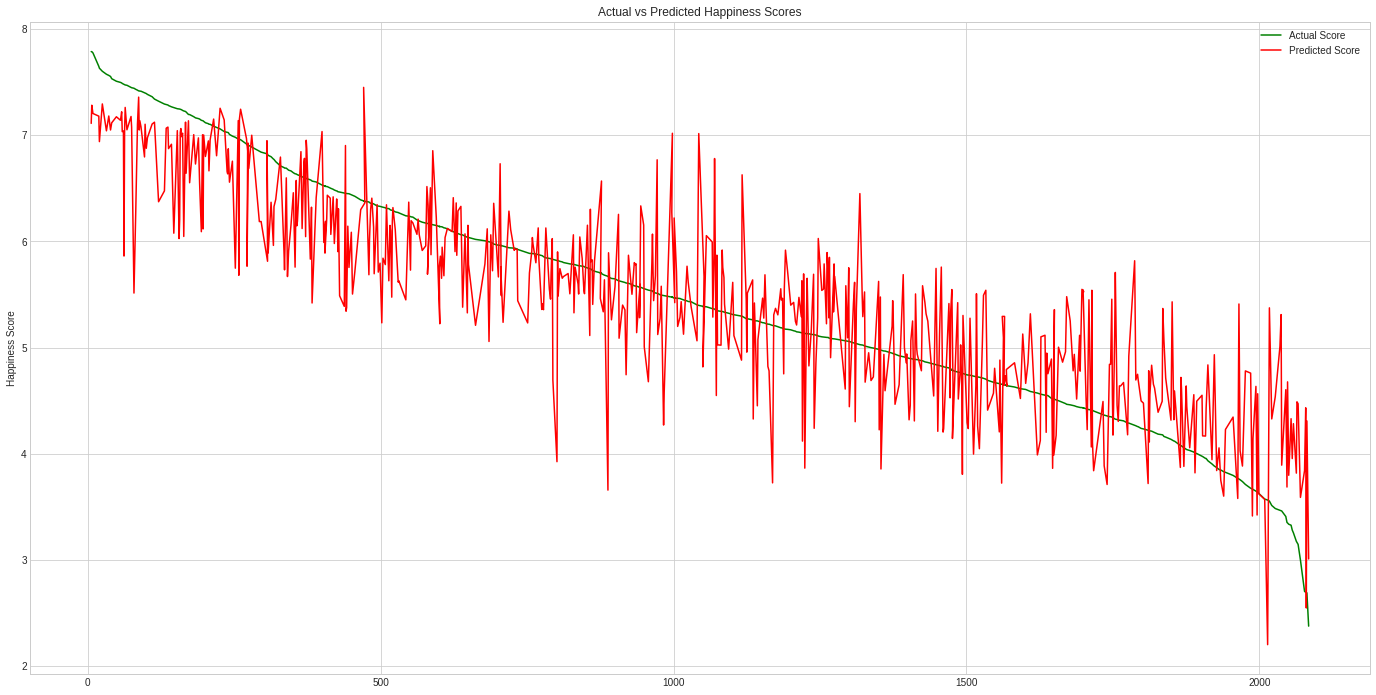

In [ ]:
actual = values['Actual value']
predicted = values['Predicted value']
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(24, 12))

ax.plot(actual, color = 'green', label = 'Actual Score')
ax.plot(predicted, color = 'red', label = 'Predicted Score')
ax.set(xlabel='', ylabel='Happiness Score',
       title='Actual vs Predicted Happiness Scores');
ax.legend(loc = 'upper right')
plt.show()

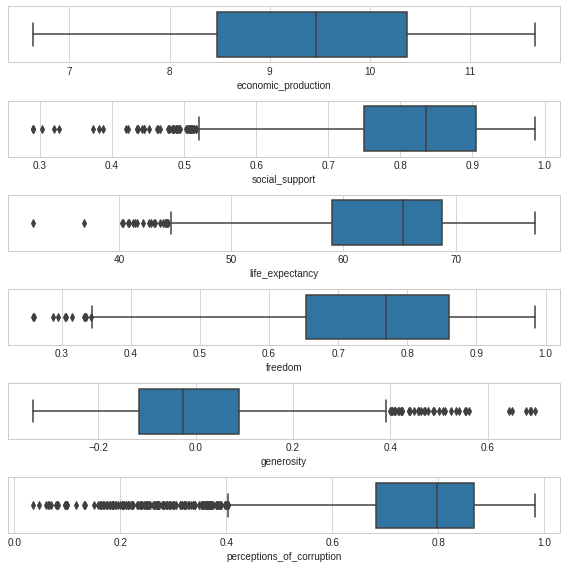

In [ ]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
fig, axs = plt.subplots(6, figsize = (8,8))
plt1 = sns.boxplot(happiness_df['economic_production'], ax = axs[0])
plt2 = sns.boxplot(happiness_df['social_support'], ax = axs[1])
plt3 = sns.boxplot(happiness_df['life_expectancy'], ax = axs[2])
plt4 = sns.boxplot(happiness_df['freedom'], ax = axs[3])
plt5 = sns.boxplot(happiness_df['generosity'], ax = axs[4])
plt6 = sns.boxplot(happiness_df['perceptions_of_corruption'], ax = axs[5])
plt.tight_layout()

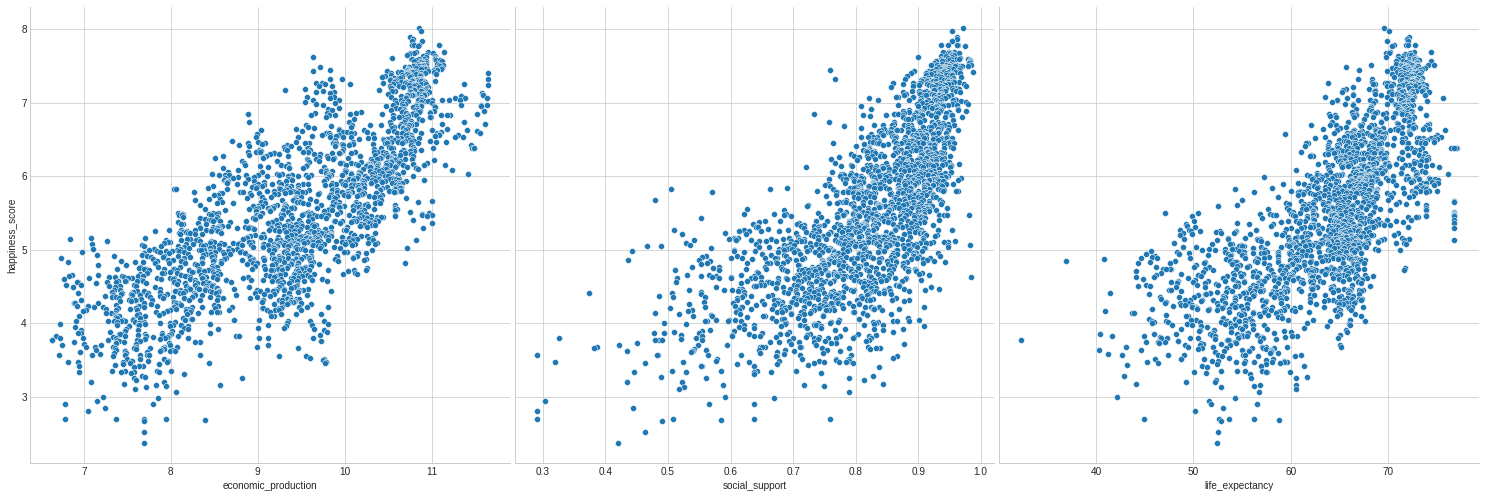

In [ ]:
sns.pairplot(happiness_df, x_vars=["economic_production", "social_support", "life_expectancy"],
             y_vars="happiness_score", height=7, aspect=1, kind='scatter')
plt.show()

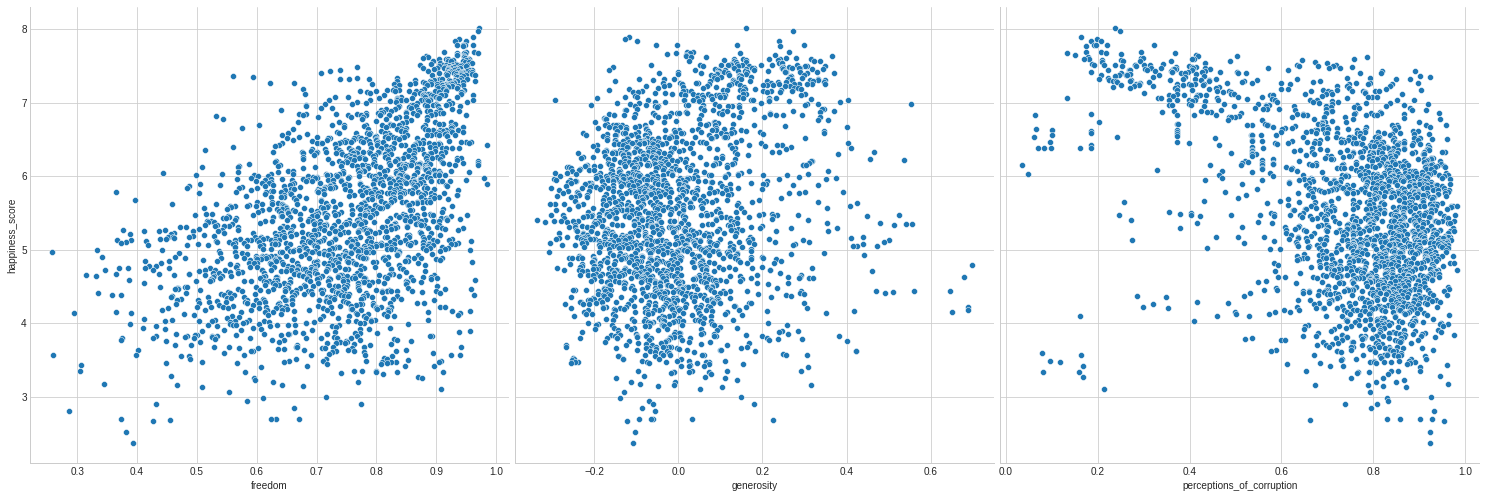

In [ ]:
sns.pairplot(happiness_df, x_vars=["freedom", "generosity", "perceptions_of_corruption"],
             y_vars="happiness_score", height=7, aspect=1, kind='scatter')
plt.show()

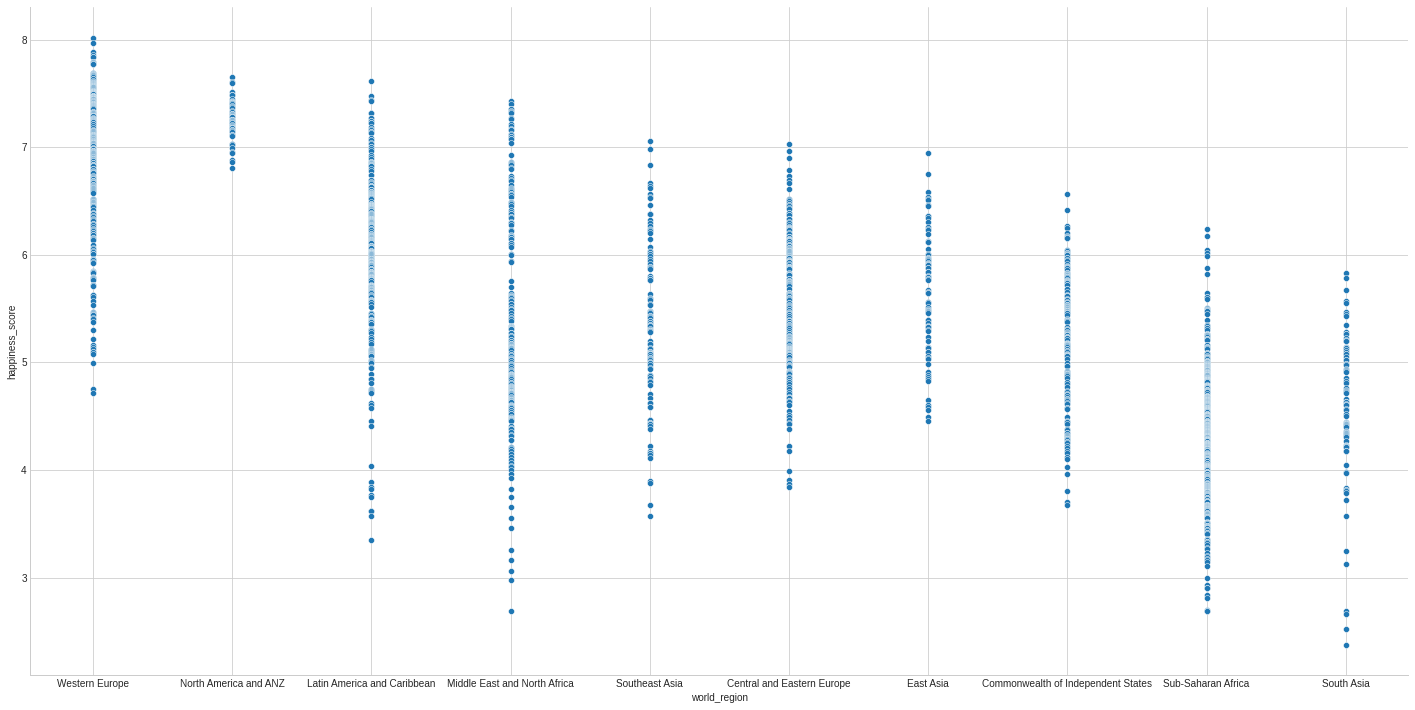

In [ ]:
sns.pairplot(happiness_df, x_vars="world_region",
             y_vars="happiness_score", height=10, aspect=2, kind='scatter')
plt.show()

In [ ]:
# RANDOM FOREST MODEL

import pandas as pd
#from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Read data and store into a Pandas DataFrame
url = "https://raw.githubusercontent.com/Wavelydavely/World_Happiness_Report/main/Cleaned_Data/WHR_noNull.csv"
happiness_no_null = pd.read_csv(url)
happiness_no_null.head()


,country,year,world_region,happiness_score,economic_production,social_support,life_expectancy,freedom,generosity,perceptions_of_corruption
0,Denmark,2005,Western Europe,8.019,10.851,0.972,69.60,0.971,0.161533,0.237
1,Denmark,2008,Western Europe,7.971,10.880,0.954,70.08,0.970,0.272000,0.248
2,Finland,2020,Western Europe,7.889,10.750,0.962,72.10,0.962,-0.116000,0.164
3,Finland,2018,Western Europe,7.858,10.783,0.962,71.90,0.938,-0.127000,0.199
4,Finland,2021,Western Europe,7.842,10.775,0.954,72.00,0.949,-0.098000,0.186


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = happiness_no_null.copy()
df2['country'] = le.fit_transform(df2['country'])
df2.head()


,country,year,world_region,happiness_score,economic_production,social_support,life_expectancy,freedom,generosity,perceptions_of_corruption
0,38,2005,Western Europe,8.019,10.851,0.972,69.60,0.971,0.161533,0.237
1,38,2008,Western Europe,7.971,10.880,0.954,70.08,0.970,0.272000,0.248
2,46,2020,Western Europe,7.889,10.750,0.962,72.10,0.962,-0.116000,0.164
3,46,2018,Western Europe,7.858,10.783,0.962,71.90,0.938,-0.127000,0.199
4,46,2021,Western Europe,7.842,10.775,0.954,72.00,0.949,-0.098000,0.186


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
df3 = df2.copy()
df3['year'] = le.fit_transform(df2['year'])
df3.head()

,country,year,world_region,happiness_score,economic_production,social_support,life_expectancy,freedom,generosity,perceptions_of_corruption
0,38,0,Western Europe,8.019,10.851,0.972,69.60,0.971,0.161533,0.237
1,38,3,Western Europe,7.971,10.880,0.954,70.08,0.970,0.272000,0.248
2,46,15,Western Europe,7.889,10.750,0.962,72.10,0.962,-0.116000,0.164
3,46,13,Western Europe,7.858,10.783,0.962,71.90,0.938,-0.127000,0.199
4,46,16,Western Europe,7.842,10.775,0.954,72.00,0.949,-0.098000,0.186


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
df4 = df3.copy()
df4['world_region'] = le.fit_transform(df3['world_region'])
df4.head()

,country,year,world_region,happiness_score,economic_production,social_support,life_expectancy,freedom,generosity,perceptions_of_corruption
0,38,0,9,8.019,10.851,0.972,69.60,0.971,0.161533,0.237
1,38,3,9,7.971,10.880,0.954,70.08,0.970,0.272000,0.248
2,46,15,9,7.889,10.750,0.962,72.10,0.962,-0.116000,0.164
3,46,13,9,7.858,10.783,0.962,71.90,0.938,-0.127000,0.199
4,46,16,9,7.842,10.775,0.954,72.00,0.949,-0.098000,0.186


In [ ]:
# Define the features set.
X = df4.copy()
X = X.drop("happiness_score", axis=1)
X

,country,year,world_region,economic_production,social_support,life_expectancy,freedom,generosity,perceptions_of_corruption
0,38,0,9,10.851,0.972,69.600,0.971,0.161533,0.237
1,38,3,9,10.880,0.954,70.080,0.970,0.272000,0.248
2,46,15,9,10.750,0.962,72.100,0.962,-0.116000,0.164
3,46,13,9,10.783,0.962,71.900,0.938,-0.127000,0.199
4,46,16,9,10.775,0.954,72.000,0.949,-0.098000,0.186
...,...,...,...,...,...,...,...,...,...
2080,26,11,8,6.785,0.290,44.900,0.624,0.033000,0.859
2081,139,8,4,8.396,0.585,58.760,0.455,0.225000,0.663
2082,0,12,6,7.697,0.491,52.800,0.427,-0.121000,0.954
2083,0,16,6,7.695,0.463,52.493,0.382,-0.102000,0.924


In [ ]:
# Define the target set.
y = df4["happiness_score"].ravel()
y[:5]

array([8.019, 7.971, 7.889, 7.858, 7.842])

In [ ]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test2 = train_test_split(X, y, random_state=78)

In [ ]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create a random forest classifier.
rf_model = RandomForestRegressor(n_estimators=128, random_state=78) 

In [ ]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [ ]:
#Model Evaluation
import numpy as np

from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test2, predictions)
MSE = metrics.mean_squared_error(y_test2, predictions)
RMSE = np.sqrt(metrics.mean_squared_error(y_test2, predictions))
print('R squared: {:.2f}'.format(rf_model.score(X, y)))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)

R squared: -0.87
Mean Absolute Error: 0.25771815134099607
Mean Square Error: 0.12041892951374845
Root Mean Square Error: 0.34701430736174044


In [ ]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.02249062, 0.0160801 , 0.03020106, 0.55679326, 0.08817825,
       0.17444962, 0.05297572, 0.02820848, 0.0306229 ])

In [ ]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.5567932613228536, 'economic_production'),
 (0.1744496175483184, 'life_expectancy'),
 (0.08817824698977511, 'social_support'),
 (0.05297571673356052, 'freedom'),
 (0.030622898464407123, 'perceptions_of_corruption'),
 (0.030201057070549767, 'world_region'),
 (0.02820848158504282, 'generosity'),
 (0.02249062167031263, 'country'),
 (0.01608009861518013, 'year')]

In [ ]:
# Create vector of predictions
y_pred2 = rf_model.predict(X_test)
y_pred2

array([6.80221094, 6.52053125, 6.66421094, 6.40946094, 6.62385156,
       6.76144531, 6.67098438, 6.69588281, 6.57374219, 6.79828906,
       6.66952344, 6.65589844, 6.48569531, 6.76627344, 6.75111719,
       6.64386719, 6.65509375, 6.52492969, 6.58007031, 6.79014063,
       6.56747656, 6.50396094, 6.42832813, 6.61221094, 6.47663281,
       6.37649219, 6.4183125 , 6.71455469, 6.56003906, 6.56603125,
       6.64092188, 6.54632031, 6.64529688, 6.49275   , 6.35178125,
       6.72460156, 6.59782031, 6.69398438, 6.74464844, 6.22690625,
       6.78553906, 6.64219531, 6.76180469, 6.78011719, 6.32494531,
       6.72989844, 6.62795313, 6.45700781, 6.67698438, 6.68010938,
       6.53138281, 6.61896875, 6.59007813, 6.74938281, 6.79546094,
       6.64142969, 6.59189844, 6.56673438, 6.72442969, 6.77904688,
       6.68205469, 6.58650781, 6.46741406, 6.59055469, 6.70085156,
       6.71776563, 6.22071875, 6.42932813, 6.58390625, 6.71134375,
       6.78828125, 6.63589063, 6.7939375 , 6.72221875, 6.44135

In [ ]:
# Show actual value with predicted value
regressor_diff2 = pd.DataFrame({'Actual value': y_test2, 'Predicted value': y_pred2})
values2 = regressor_diff2.sort_values('Predicted value', ascending=False)
values2.reset_index(drop=True, inplace=True)
#regressor_diff2
values2

,Actual value,Predicted value
0,7.533,6.848070
1,7.418,6.848031
2,7.224,6.842328
3,7.554,6.839922
4,7.575,6.839922
...,...,...
517,4.720,6.226906
518,5.208,6.226617
519,3.667,6.220719
520,2.693,6.214984


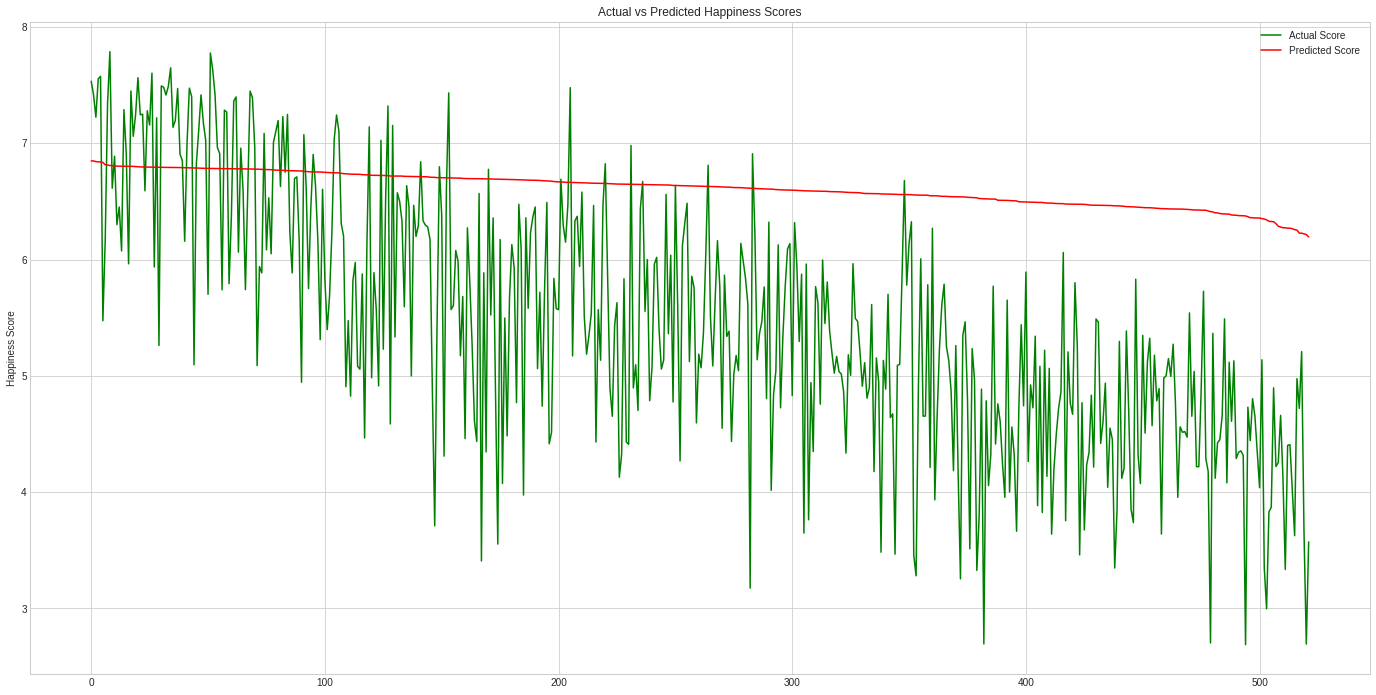

In [ ]:
actual = values2['Actual value']
predicted = values2['Predicted value']
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(24, 12))

ax.plot(actual, color = 'green', label = 'Actual Score')
ax.plot(predicted, color = 'red', label = 'Predicted Score')
ax.set(xlabel='', ylabel='Happiness Score',
       title='Actual vs Predicted Happiness Scores');
ax.legend(loc = 'upper right')
plt.show()